# Speech recognition example

## 1. Audio data

In [1]:
# Import the packages needed for this analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

/var/folders/38/w8zx9pw96ml6x9h41ms703nm0000gn/T/ipykernel_77908/2527291655.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_sample, sig_audio = wavfile.read("welcome.wav")


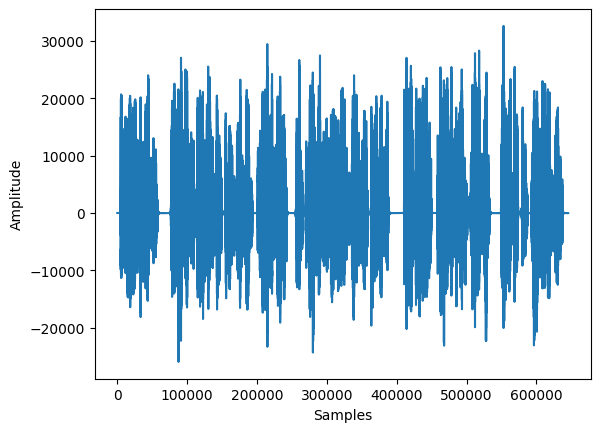


Shape of Signal: (645632,)
Signal Datatype: int16
Signal duration: 40.35 seconds
Sample frequency: 16000


In [2]:
# Read the audio file and determine the audio signal and sampling frequency 
freq_sample, sig_audio = wavfile.read("welcome.wav")
plt.plot(sig_audio) # 40.35 * 16000 = 645600
plt.xlabel('Samples')
plt.ylabel('Amplitude') # from -32768 to +32767
plt.show()

# Output the parameters
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')
print('Sample frequency:', freq_sample)

## 2. Audio transformation

In [3]:
# Extract the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(int)

# Use Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)

In [4]:
# Normalize the frequency domain and square it 
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)

# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
    signal_freq[1:transform_len] *= 2
else:
    signal_freq[1:transform_len-1] *= 2

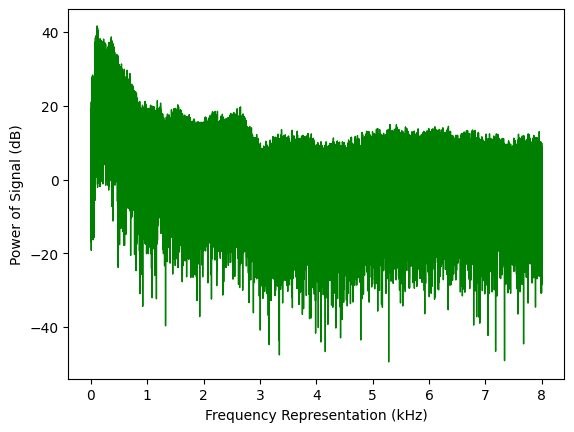

In [5]:
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)

x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0

plt.figure()
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('Frequency Representation (kHz)')
plt.ylabel('Power of Signal (dB)')
plt.show()


## 3. Feature extraction

In [6]:
#pip install python_speech_features


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


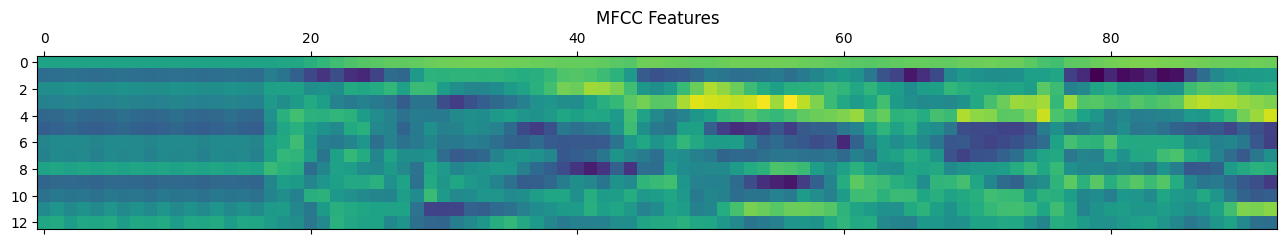

In [21]:
from python_speech_features import mfcc, logfbank

#sig_audio = sig_audio[:15000]

# Using MFCC to extract features from the signal
mfcc_feat = mfcc(sig_audio, freq_sample)

print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])

mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)
plt.title('MFCC Features')
plt.show()


Filter bank
Window Count = 93
Individual Feature Length = 26


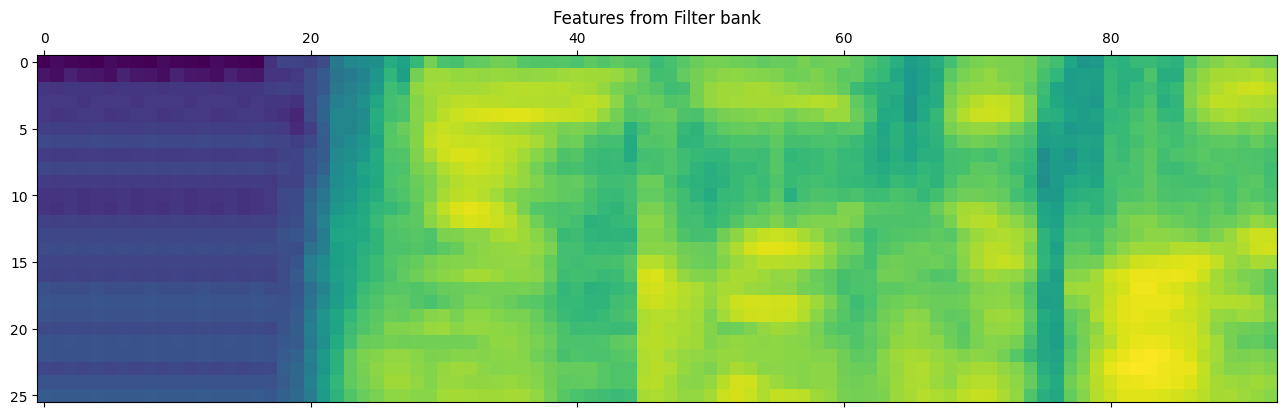

In [22]:
# Generate filter bank features
fb_feat = logfbank(sig_audio, freq_sample)

print('\nFilter bank\nWindow Count =', fb_feat.shape[0])
print('Individual Feature Length =', fb_feat.shape[1])

fb_feat = fb_feat.T
plt.matshow(fb_feat)
plt.title('Features from Filter bank')
plt.show()

## 4. Speech recognition

In [9]:
#pip install SpeechRecognition

In [10]:
#pip install pipwin

In [11]:
#pip install pyaudio

In [12]:
#!/usr/bin/env python3
import speech_recognition as sr

# obtain audio from the microphone
r = sr.Recognizer()

with sr.Microphone() as source:
    r.adjust_for_ambient_noise(source, duration=3)
    print("Say something!")
    audio = r.listen(source)

# recognize speech using Google Speech Recognition
try:
    # for testing purposes, we're just using the default API key
    # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
    # instead of `r.recognize_google(audio)`
    print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))


Say something!
Google Speech Recognition thinks you said hola hola
